**Practical 10**

**Aim: Data Visualization and Storytelling**

**a) Create meaningful visualizations using data visualization tools.**

**b) Combine multiple visualizations to tell a compelling data story.**

**c) Present the findings and insights in a clear and concise manner.**

**T114 | Bhumika Shelar**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Covid Data.csv")
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97.0,1.0,65.0,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0
1,2,1,2,1,03/06/2020,97.0,1.0,72.0,97.0,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5.0,97.0
2,2,1,2,2,09/06/2020,1.0,2.0,55.0,97.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0
3,2,1,1,1,12/06/2020,97.0,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0,97.0
4,2,1,2,1,21/06/2020,97.0,2.0,68.0,97.0,1.0,...,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,97.0


In [ ]:
df.isnull().sum()

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
DATE_DIED,0
INTUBED,1
PNEUMONIA,1
AGE,1
PREGNANT,1
DIABETES,1


/tmp/ipython-input-1627173247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PATIENT_TYPE', data=df, palette="Set2")


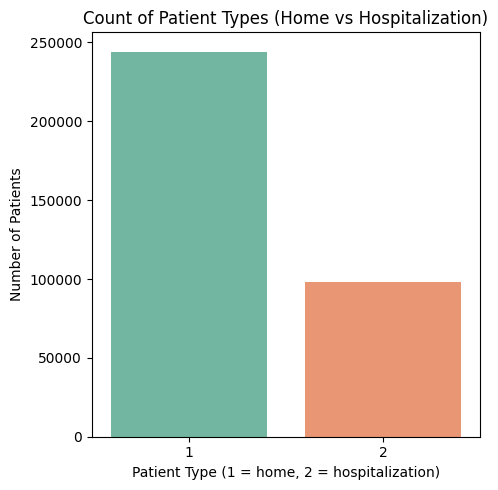

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='PATIENT_TYPE', data=df, palette="Set2")
plt.title("Count of Patient Types (Home vs Hospitalization)")
plt.xlabel("Patient Type (1 = home, 2 = hospitalization)")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()

   SEX  survived
0    1  0.905806
1    2  0.834747


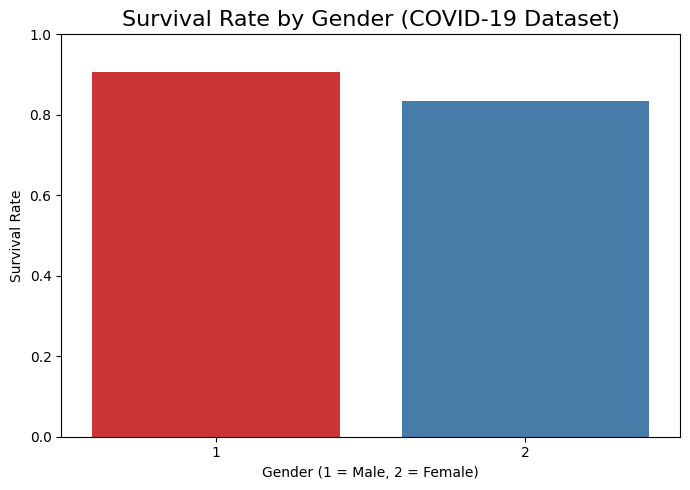

In [ ]:
# Convert outcome to survived (1) vs died (0)
df['survived'] = df['DATE_DIED'].apply(lambda x: 1 if x == '9999-99-99' else 0)

# Group by gender (SEX column)
survival_by_gender = df.groupby('SEX')['survived'].mean().reset_index()
print(survival_by_gender)
import warnings
warnings.filterwarnings("ignore")
# Plot
plt.figure(figsize=(7,5))
sns.barplot(x='SEX', y='survived', data=survival_by_gender, palette='Set1')
plt.title("Survival Rate by Gender (COVID-19 Dataset)", fontsize=16)
plt.xlabel("Gender (1 = Male, 2 = Female)")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
# Assuming '9999-99-99' in DATE_DIED indicates survival
df['survived'] = (df['DATE_DIED'] == '9999-99-99').astype(int)

# Group by SEX and calculate the mean survival rate
survival_by_gender = df.groupby('SEX')['survived'].mean().reset_index()

# Rename 'SEX' to 'sex' to match the plotting code
survival_by_gender = survival_by_gender.rename(columns={'SEX': 'sex'})

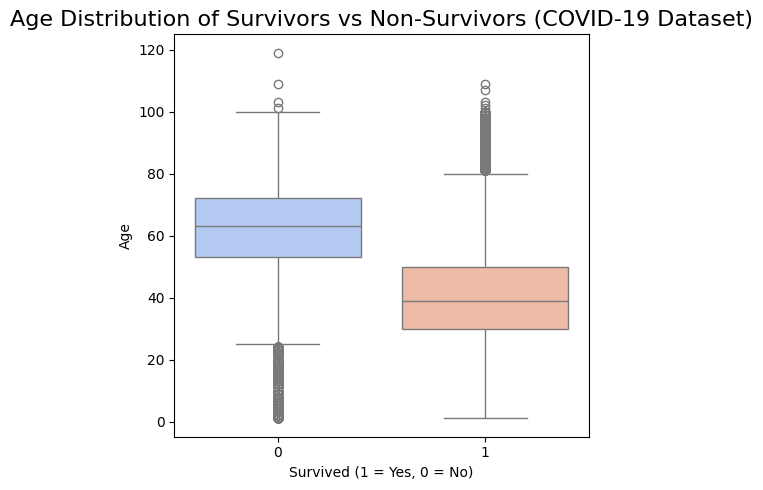

In [ ]:
# Create survived column
df['survived'] = df['DATE_DIED'].apply(lambda x: 1 if x == '9999-99-99' else 0)
warnings.filterwarnings("ignore")
# Filter out invalid ages (if any negative or missing)
df = df[df['AGE'] > 0]
# Plot age distribution for survivors vs non-survivors
plt.figure(figsize=(5, 5))
sns.boxplot(x="survived", y="AGE", data=df, palette="coolwarm")
plt.title("Age Distribution of Survivors vs Non-Survivors (COVID-19 Dataset)", fontsize=16)
plt.xlabel("Survived (1 = Yes, 0 = No)")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

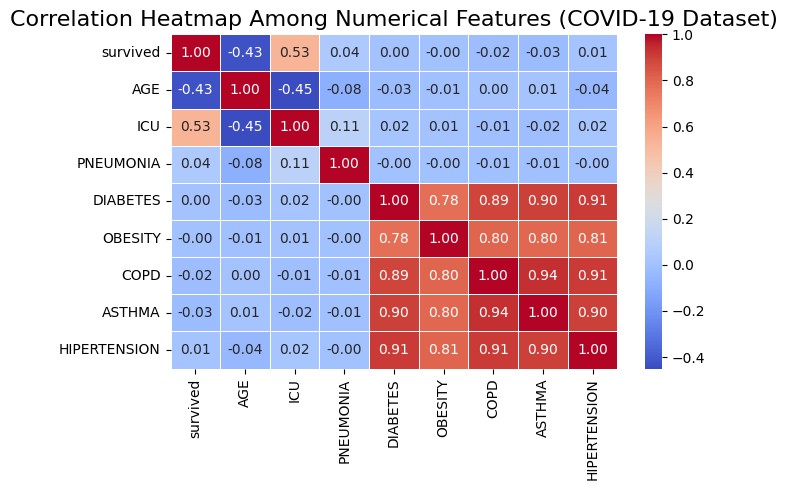

In [ ]:
df['survived'] = df['DATE_DIED'].apply(lambda x: 1 if x == '9999-99-99' else 0)

# Select important numerical features for correlation
numeric_features = [
    'survived', 'AGE', 'ICU', 'PNEUMONIA', 'DIABETES',
    'OBESITY', 'COPD', 'ASTHMA', 'HIPERTENSION'
]
# Keep only existing columns (avoid missing key error)
numeric_features = [col for col in numeric_features if col in df.columns]
correlation_matrix = df[numeric_features].corr()
# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",
            fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap Among Numerical Features (COVID-19 Dataset)", fontsize=16)
plt.tight_layout()
plt.show()

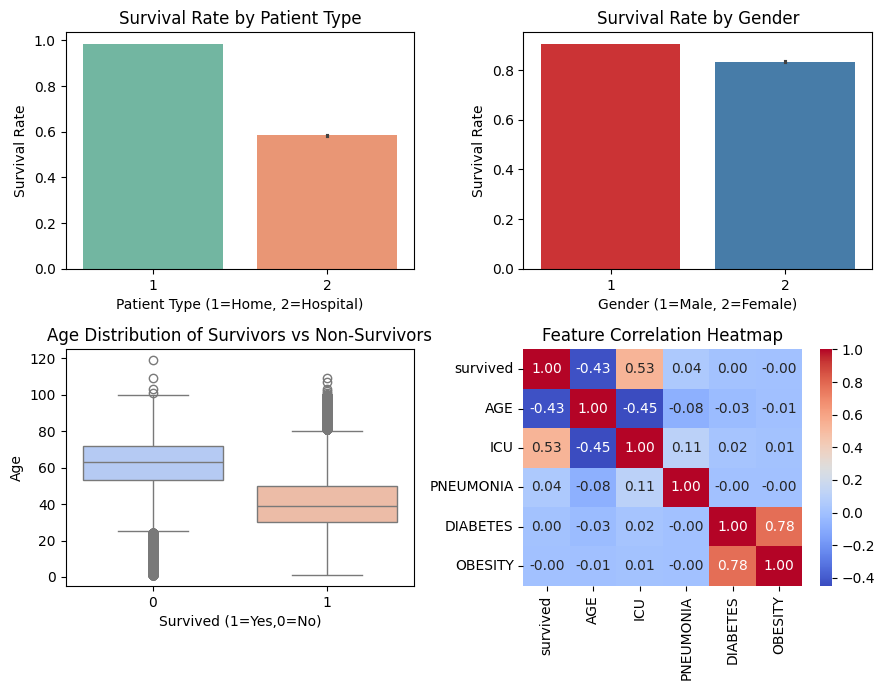

In [ ]:
df = df[df["AGE"] > 0]
df["survived"] = (df["DATE_DIED"] == "9999-99-99").astype(int)
warnings.filterwarnings("ignore")
# Create smaller subplot figure (reduced size)
fig, axes = plt.subplots(2, 2, figsize=(7, 7))

# 1. Survival Rate by Patient Type
sns.barplot(data=df, x='PATIENT_TYPE', y='survived', palette='Set2', ax=axes[0, 0])
axes[0, 0].set(title="Survival Rate by Patient Type",
               xlabel="Patient Type (1=Home, 2=Hospital)", ylabel="Survival Rate")

# 2. Survival Rate by Gender
sns.barplot(data=df, x='SEX', y='survived', palette='Set1', ax=axes[0, 1])
axes[0, 1].set(title="Survival Rate by Gender",
               xlabel="Gender (1=Male, 2=Female)", ylabel="Survival Rate")

# 3. Age Distribution vs Survival
sns.boxplot(data=df, x="survived", y="AGE", palette="coolwarm", ax=axes[1, 0])
axes[1, 0].set(title="Age Distribution of Survivors vs Non-Survivors",
               xlabel="Survived (1=Yes,0=No)", ylabel="Age")

# 4. Correlation Heatmap
features = [c for c in ['survived', 'AGE', 'ICU', 'PNEUMONIA', 'DIABETES', 'OBESITY'] if c in df]
sns.heatmap(df[features].corr(), annot=True, fmt=".2f", cmap="coolwarm", ax=axes[1, 1])
axes[1, 1].set(title="Feature Correlation Heatmap")

plt.tight_layout()
plt.show()

In [ ]:
insights = {
    "Survival by Patient Type": "Patients treated at home (PATIENT_TYPE = 1) had a significantly higher survival rate compared to those hospitalized.",
    "Survival by Gender": "Females (SEX = 2) showed a higher survival rate than males.",
    "Age Distribution": "Non-survivors were generally older, indicating that survival decreases with increasing age.",
    "Correlation Insights": "ICU admission and comorbidities like diabetes and obesity show negative correlation with survival, meaning patients with these conditions are at higher risk."
}

for key, value in insights.items():
    print(f"{key}: {value}\n")


Survival by Patient Type: Patients treated at home (PATIENT_TYPE = 1) had a significantly higher survival rate compared to those hospitalized.

Survival by Gender: Females (SEX = 2) showed a higher survival rate than males.

Age Distribution: Non-survivors were generally older, indicating that survival decreases with increasing age.

Correlation Insights: ICU admission and comorbidities like diabetes and obesity show negative correlation with survival, meaning patients with these conditions are at higher risk.

